<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regressão Linear</h1>

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

https://matplotlib.org/

https://pandas.pydata.org/

http://www.numpy.org/

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Bibliotecas opcionais

https://docs.python.org/3/library/warnings.html

## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O objetivo deste treinamento será estimar um modelo de <b>Machine Learning</b> utilizando a técnica de <b>Regressão Linear</b> para demonstrar os impactos das variáveis disponibilizadas neste dataset sobre o consumo de cerveja (Y). No final do projeto teremos um modelo de previsão para o consumo médio de cerveja segundo os inputs de um conjunto de variáveis (X's).</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>data</b> - Data</li>
    <li><b>temp_media</b> - Temperatura Média (°C)</li>
    <li><b>temp_min</b> - Temperatura Mínima (°C)</li>
    <li><b>temp_max</b> - Temperatura Máxima (°C)</li>
    <li><b>chuva</b> - Precipitação (mm)</li>
    <li><b>fds</b> - Final de Semana (1 = Sim; 0 = Não)</li>
    <li><b>consumo</b> - Consumo de Cerveja (litros)</li>
</ul>

## Leitura dos dados

In [2]:
dados = pd.read_csv('cerveja.csv', sep = ';')

## Visualizar os dados

In [3]:
dados.head(10)

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900
5,06/01/2015,23.78,20.1,30.5,12.2,0,28218
6,07/01/2015,24.00,19.5,33.7,0.0,0,29732
7,08/01/2015,24.90,19.5,32.8,48.6,0,28397
8,09/01/2015,28.20,21.9,34.0,4.4,0,24886
9,10/01/2015,26.76,22.1,34.2,0.0,1,37937


## Verificando o tamanho do dataset

In [4]:
dados.shape[0]

365

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [5]:
dados.describe().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

In [6]:
dados.corr().round(3)

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.000,0.863,0.923,0.024,-0.051,0.575
temp_min,0.863,1.000,0.673,0.099,-0.060,0.393
temp_max,0.923,0.673,1.000,-0.049,-0.040,0.643
chuva,0.024,0.099,-0.049,1.000,0.002,-0.194
fds,-0.051,-0.060,-0.040,0.002,1.000,0.506
consumo,0.575,0.393,0.643,-0.194,0.506,1.000


# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

## Plotando a variável *dependente* (y)
https://pandas.pydata.org/pandas-docs/stable/visualization.html

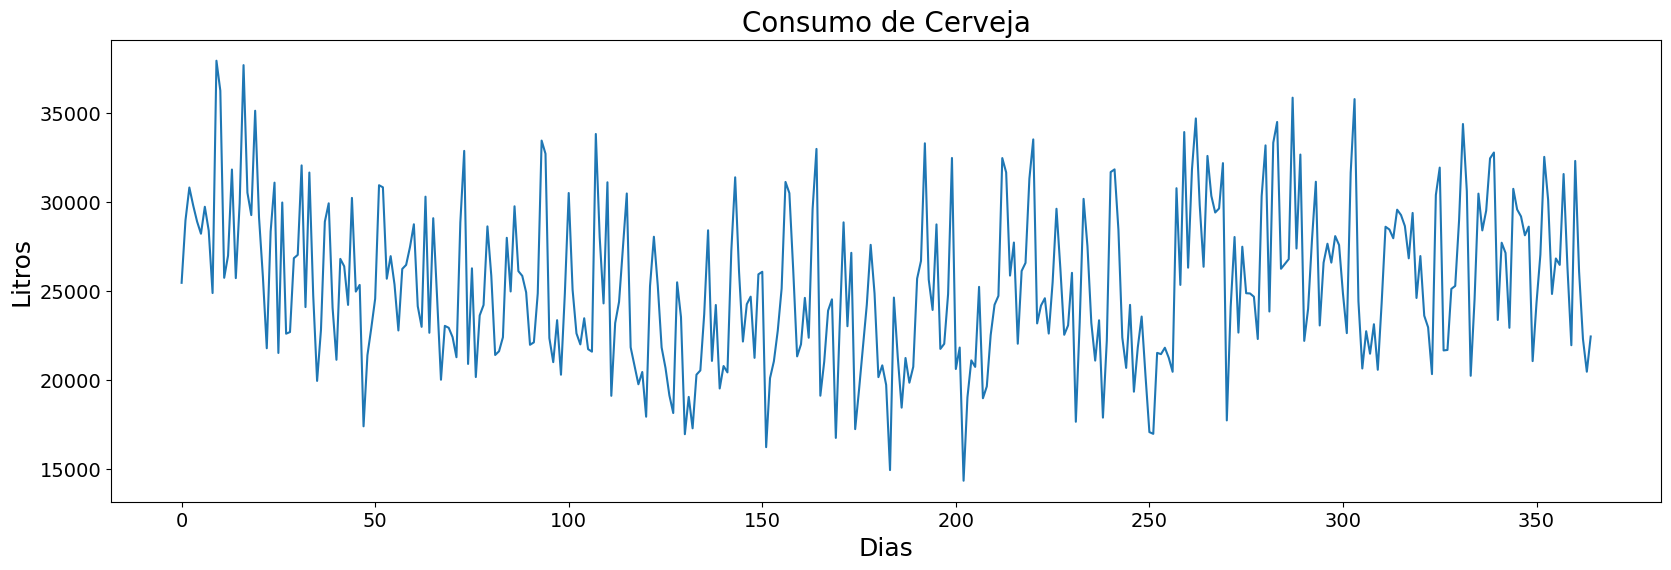

In [7]:
fig, ax = plt.subplots(figsize=(20,6))

ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=18)
ax.set_xlabel('Dias', fontsize=18)
ax = dados['consumo'].plot(fontsize=14)

# <font color='red' style='font-size: 30px;'>Box Plot</font>
<hr style='border: 2px solid red;'>

<img width='700px' src='Box-Plot.png'>

## Importando biblioteca seaborn
https://seaborn.pydata.org/
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O Seaborn é uma biblioteca Python de visualização de dados baseada no matplotlib. Ela fornece uma interface de alto nível para desenhar gráficos estatísticos.</p>

In [8]:
import seaborn as sns

## Box plot da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

Text(0.5, 0, 'Litros')

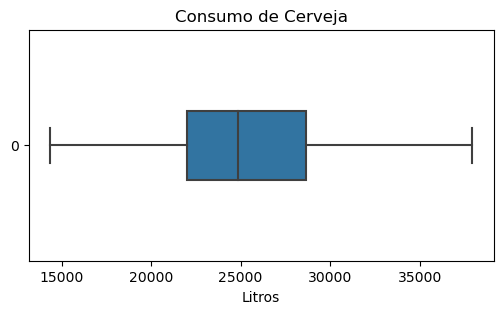

In [9]:
ax = sns.boxplot(data = dados['consumo'], orient = 'h', width=0.3)
ax.figure.set_size_inches(6,3)
ax.set_title('Consumo de Cerveja')
ax.set_xlabel('Litros')

# <font color='red' style='font-size: 30px;'>Box Plot com Duas Variáveis</font>
<hr style='border: 2px solid red;'>

## Investigando a variável *dependente* (y) segundo determinada característica

Text(0, 0.5, 'Fim de Semana')

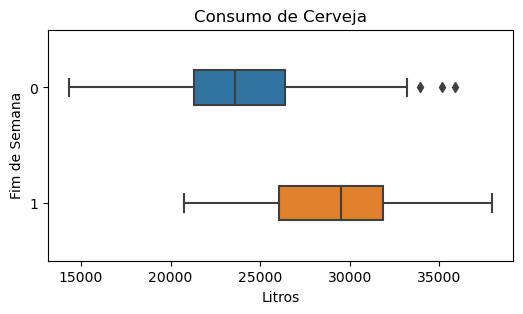

In [10]:
ax = sns.boxplot(data = dados, y = 'fds' , x = 'consumo', orient = 'h', width=0.3)
ax.figure.set_size_inches(6,3)
ax.set_title('Consumo de Cerveja')
ax.set_xlabel('Litros')
ax.set_ylabel('Fim de Semana')

## Configurações de estilo e cor da biblioteca *seaborn*

### Controle de estilo

> ####  API
> https://seaborn.pydata.org/api.html#style-api

> #### Tutorial
> https://seaborn.pydata.org/tutorial/aesthetics.html#aesthetics-tutorial

### Paleta de cores

> #### API
> https://seaborn.pydata.org/api.html#palette-api

> #### Tutorial
> https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial

In [11]:
sns.set_palette("YlOrBr_r")
sns.set_style("white")

Text(0, 0.5, 'Fim de Semana')

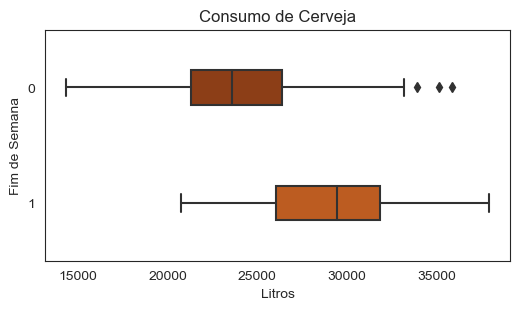

In [12]:
ax = sns.boxplot(data = dados, y = 'fds' , x = 'consumo', orient = 'h', width=0.3)
ax.figure.set_size_inches(6,3)
ax.set_title('Consumo de Cerveja')
ax.set_xlabel('Litros')
ax.set_ylabel('Fim de Semana')

# <font color='red' style='font-size: 30px;'>Distribuição de Frequências</font>
<hr style='border: 2px solid red;'>

## Distribuição de frequências da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

Text(0, 0.5, 'Frequência')

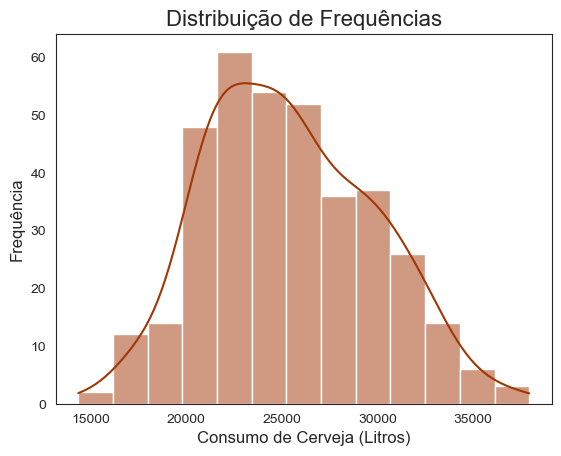

In [13]:
ax = sns.histplot(data = dados['consumo'], kde=True)
ax.set_title('Distribuição de Frequências', fontsize = 16)
ax.set_xlabel('Consumo de Cerveja (Litros)', fontsize = 12)
ax.set_ylabel('Frequência', fontsize = 12)

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (pairplot)</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersão entre as variáveis do dataset

## seaborn.pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota o relacionamento entre pares de variáveis em um dataset.</p>

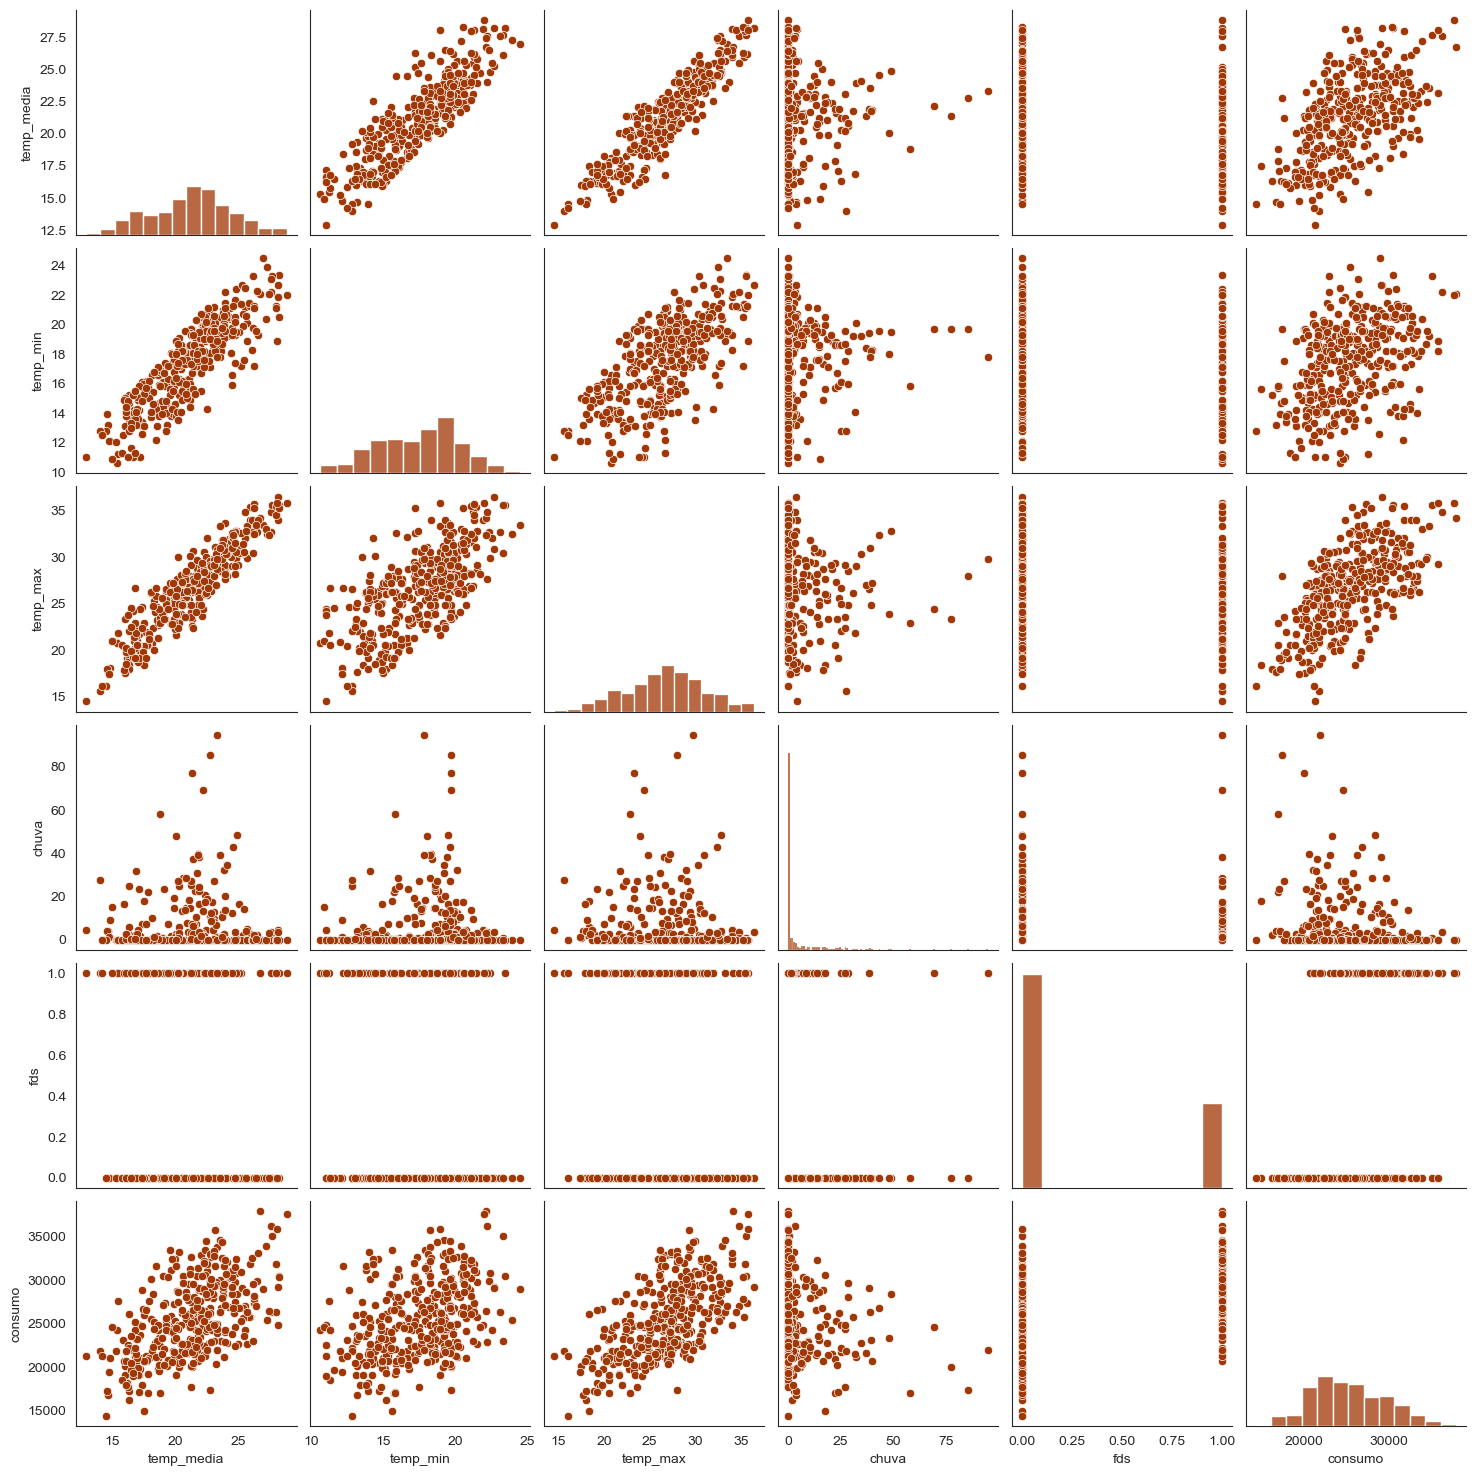

In [14]:
sns.pairplot(dados)

## Plotando o pairplot fixando somente uma variável no eixo y

Text(0.5, 1.15, 'Dispersão entre as variáveis')

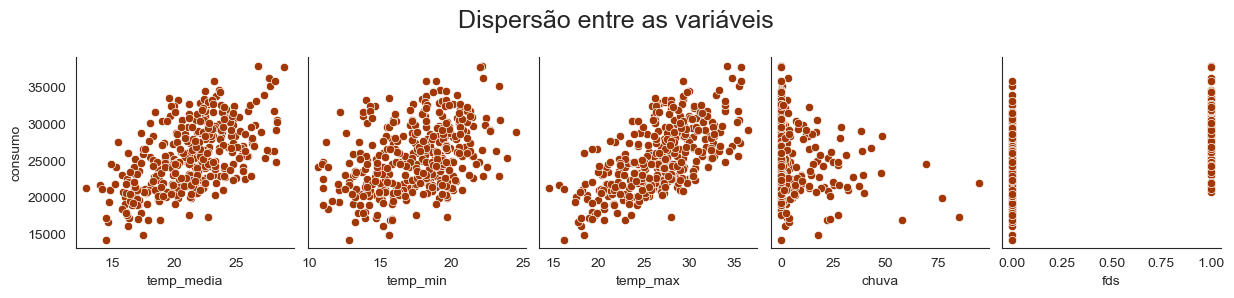

In [15]:
ax = sns.pairplot(data = dados, y_vars = 'consumo',x_vars = ['temp_media','temp_min','temp_max','chuva','fds'])
ax.fig.suptitle('Dispersão entre as variáveis', fontsize = 18, y = 1.15)

Text(0.5, 1.15, 'Dispersão entre as variáveis')

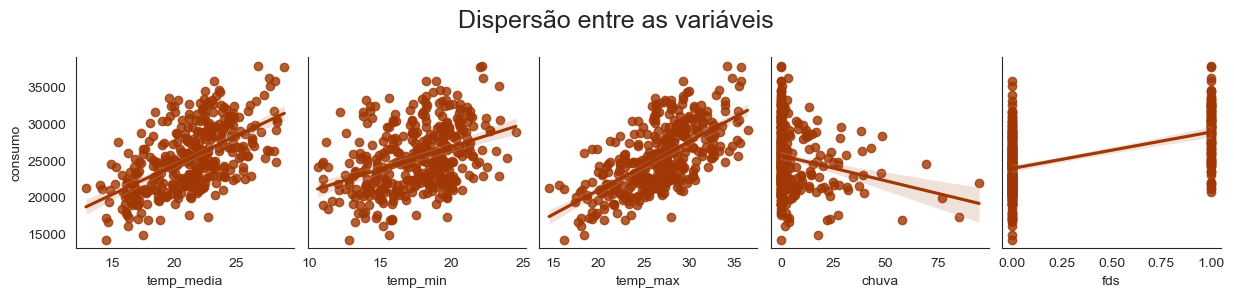

In [16]:
ax = sns.pairplot(data = dados, y_vars = 'consumo',x_vars = ['temp_media','temp_min','temp_max','chuva','fds'], kind = 'reg')
ax.fig.suptitle('Dispersão entre as variáveis', fontsize = 18, y = 1.15)

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (jointplot)</font>
<hr style='border: 2px solid red;'>

## seaborn.jointplot

https://seaborn.pydata.org/generated/seaborn.jointplot.html?highlight=jointplot#seaborn.jointplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota o relacionamento entre duas variáveis e suas respectivas distribuições de frequência.</p>

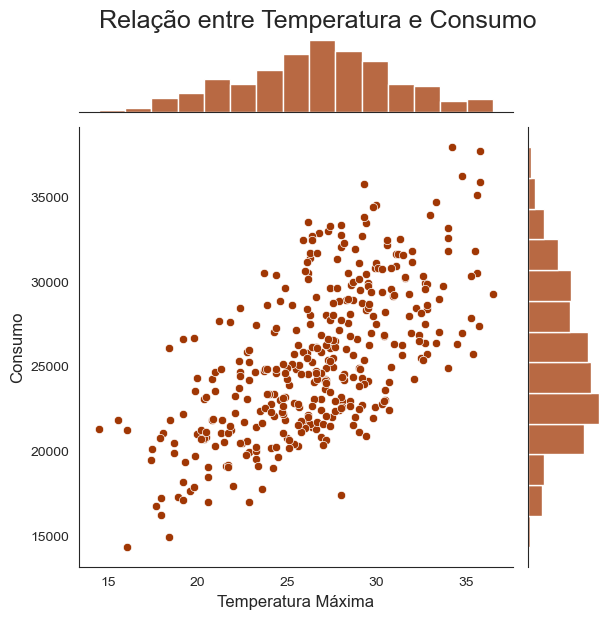

In [17]:
ax = sns.jointplot(data = dados, x = 'temp_max', y = 'consumo')
ax.fig.suptitle('Relação entre Temperatura e Consumo', fontsize = 18, y = 1.02)
ax.set_axis_labels('Temperatura Máxima', 'Consumo', fontsize = 12)

## Plotando um jointplot com a reta de regressão estimada

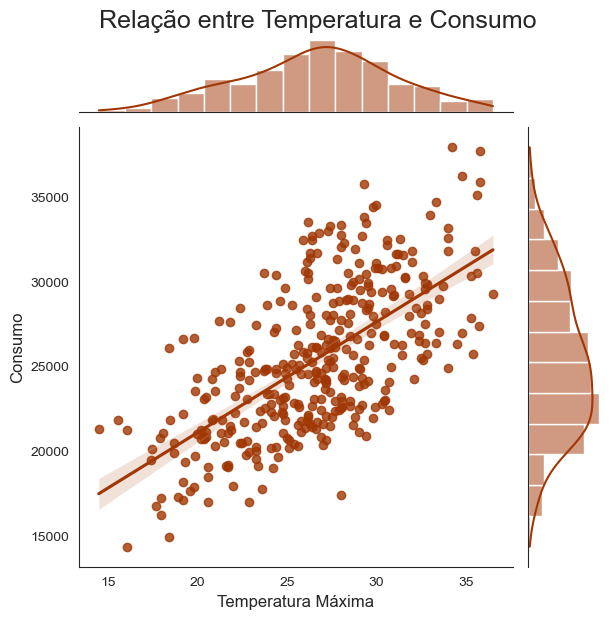

In [18]:
ax = sns.jointplot(data = dados, x = 'temp_max', y = 'consumo', kind = 'reg')
ax.fig.suptitle('Relação entre Temperatura e Consumo', fontsize = 18, y = 1.02)
ax.set_axis_labels('Temperatura Máxima', 'Consumo', fontsize = 12)

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (lmplot)</font>
<hr style='border: 2px solid red;'>

## seaborn.lmplot

https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota a reta de regressão entre duas variáveis juntamente com a dispersão entre elas.</p>

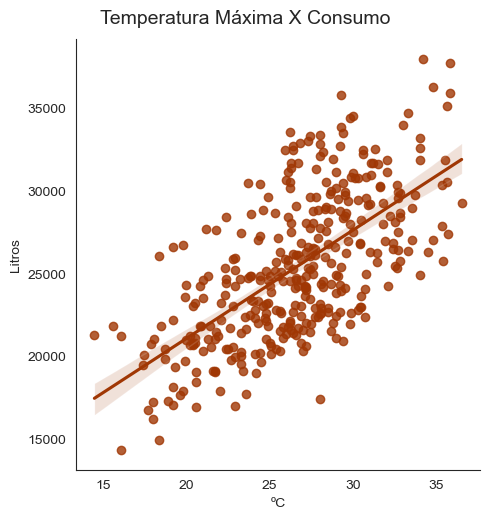

In [19]:
ax = sns.lmplot(data = dados, x='temp_max',y='consumo')
ax.fig.suptitle('Temperatura Máxima X Consumo', fontsize = 14, y=1.03)
ax.set_axis_labels('ºC','Litros', fontsize = 10)

## Plotando um lmplot utilizando uma terceira variável na análise (tipo I)

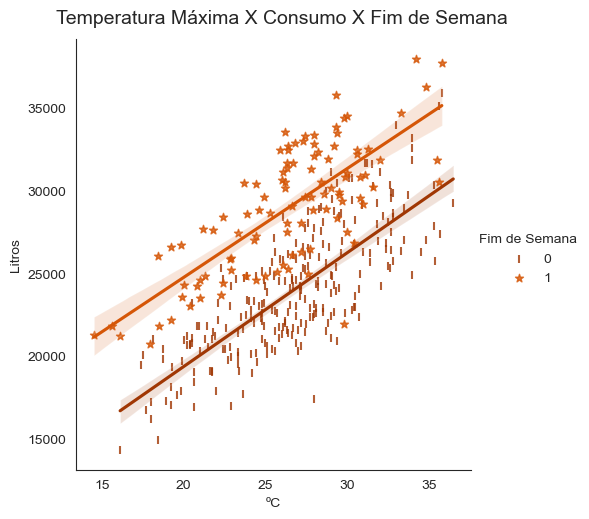

In [20]:
ax = sns.lmplot(data = dados, x='temp_max',y='consumo', hue ='fds', markers = ['|','*'], legend=False)
ax.fig.suptitle('Temperatura Máxima X Consumo X Fim de Semana', fontsize = 14, y=1.03)
ax.set_axis_labels('ºC','Litros', fontsize = 10)
ax.add_legend(title = 'Fim de Semana')

## Plotando um lmplot utilizando uma terceira variável na análise (tipo II)

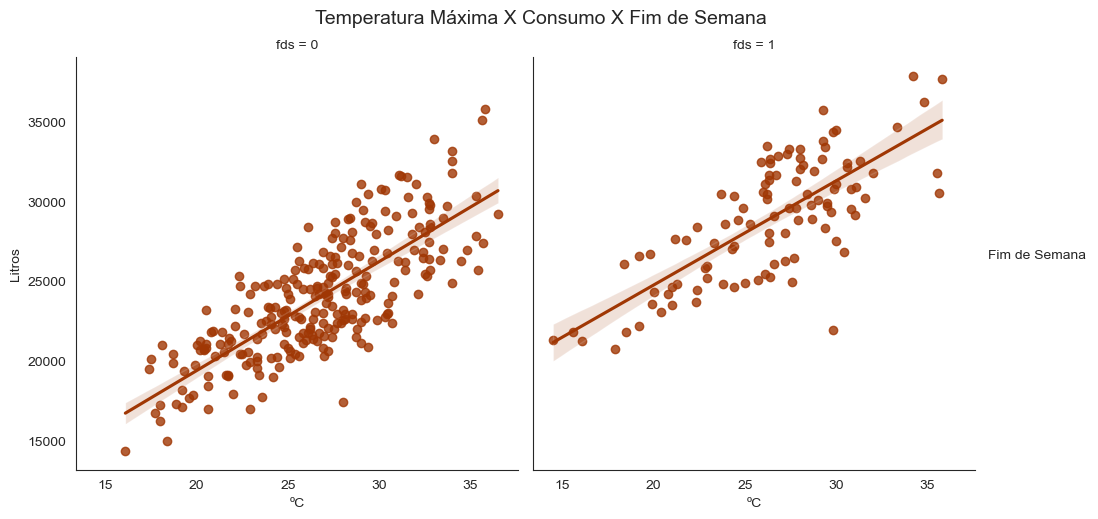

In [21]:
ax = sns.lmplot(data = dados, x='temp_max',y='consumo', col ='fds')
ax.fig.suptitle('Temperatura Máxima X Consumo X Fim de Semana', fontsize = 14, y=1.03)
ax.set_axis_labels('ºC','Litros', fontsize = 10)
ax.add_legend(title = 'Fim de Semana')

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear para o Consumo</font>
<hr style='border: 2px solid red;'>

# Regresão Linear
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável <b>dependente</b>) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.</p>


## scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O *scikit-learn* é um módulo Python especializado em soluções para *machine learning*.</p>



## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [22]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar o Consumo de Cerveja (y)

In [23]:
y = dados['consumo']
y

0      25461
1      28972
2      30814
3      29799
4      28900
       ...  
360    32307
361    26095
362    22309
363    20467
364    22446
Name: consumo, Length: 365, dtype: int64

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [24]:
X = dados[['temp_max','chuva','fds']]
X

,temp_max,chuva,fds
0,32.5,0.0,0
1,33.5,0.0,0
2,29.9,0.0,1
3,28.6,1.2,1
4,28.3,0.0,0
...,...,...,...
360,28.2,13.6,1
361,26.7,0.0,0
362,24.1,10.3,0
363,22.4,6.3,0


## Criando os datasets de treino e de teste

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

## Verificando os tamanhos dos arquivos gerados pela função *train_test_split*

In [26]:
X_train.shape

(255, 3)

In [27]:
X_test.shape

(110, 3)

In [28]:
X_train.shape[0] + X_test.shape[0]

365

<img width='600px' src='reg_01.jpg'>

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando a classe *LinearRegression()*

In [30]:
modelo = LinearRegression()

## Utilizando o método *fit()* do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [31]:
modelo.fit(X_train,y_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [32]:
print('R² = {}'.format(modelo.score(X_train,y_train).round(2)))

R² = 0.73


## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()* do objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [33]:
y_previsto = modelo.predict(X_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [34]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))

R² = 0.69


# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

In [35]:
entrada = X_test[0:1]
entrada

,temp_max,chuva,fds
5,30.5,12.2,0


## Gerando previsão pontual

In [36]:
modelo.predict(entrada)[0]

26094.901775262017

## Criando um simulador simples

In [58]:
temp_max = 32
chuva = 0
fds = 1
entrada = [[temp_max, chuva, fds]]

print('O consumo médio estimado é de {0:.2f} Litros'.format(modelo.predict(entrada)[0]))

O consumo médio estimado é de 33264.64 Litros


C:\Users\olive\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# <font color='red' style='font-size: 30px;'>Interpretação dos Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

<img width='600px' src='reg_02.jpg'>

## Obtendo o intercepto do modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) tendo todas as variáveis explicativas excluídas do modelo. De forma mais simples, o <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) quando $X_2$ (Temperatura Máxima), $X_3$ (Chuva) e $X_4$ (Final de Semana) são iguais a zero.</p>

In [38]:
modelo.intercept_

5951.9763393124485

In [39]:
type(modelo.intercept_)

numpy.float64

## Obtendo os coeficientes de regressão

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os <b>coeficientes de regressão</b> $\beta_2$, $\beta_3$ e $\beta_4$ são conhecidos como <b>coeficientes parciais de regressão</b> ou <b>coeficientes parciais angulares</b>. Considerando o número de variáveis explicativas de nosso modelo, seu significado seria o seguinte: $\beta_2$ mede a variação no valor médio de $Y$ (Consumo de Cerveja), por unidade de variação em $X_2$ (Temperatura Máxima), mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes. Em outras palavras, ele nos dá o efeito "direto" ou "líquido" de uma unidade de variação em $X_2$ sobre o valor médio de $Y$, excluídos os efeitos que $X_3$ e $X_4$ possam ter sobre a média de $Y$. De modo análogo podemos interpretar os demais coeficientes de regressão.</p>

In [40]:
modelo.coef_

array([ 684.73675898,  -60.7824355 , 5401.08333866])

In [41]:
type(modelo.coef_)

numpy.ndarray

## Confirmando a ordem das variáveis explicativas no DataFrame

In [42]:
X.columns

Index(['temp_max', 'chuva', 'fds'], dtype='object')

## Criando uma lista com os nomes das variáveis do modelo

In [43]:
index = ['Intercepto','Temperatura Máxima','Chuva (mm)','Fim de Semana']

## Criando um DataFrame para armazenar os coeficientes do modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

In [44]:
pd.DataFrame(data = np.append(modelo.intercept_, modelo.coef_), index = index, columns = ['Parâmetros'])

,Parâmetros
Intercepto,5951.976339
Temperatura Máxima,684.736759
Chuva (mm),-60.782435
Fim de Semana,5401.083339


## Interpretação dos Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=X_4=0$) o efeito médio no Consumo de Cerveja seria de <b>5951,98 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Temperatura Máxima (°C)</b> → Mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes, o acréscimo de 1°C na Temperatura Máxima gera uma variação média no Consumo de Cerveja de <b>684,74 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Chuva (mm)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_4$ (Final de Semana) constantes, o acréscimo de 1mm de Chuva gera uma variação média no Consumo de Cerveja de <b>-60,78 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Final de Semana (Sim/Não)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_3$ (Chuva) constantes, o fato de o dia ser classificado como Final de Semana gera uma variação média no Consumo de Cerveja de <b>5401,08 litros</b>.
</p>

# <font color='red' style='font-size: 30px;'>Análises Gráficas das Previsões do Modelo</font>
<hr style='border: 2px solid red;'>

## Gerando as previsões do modelo para os dados de TREINO

In [45]:
y_previsto_train = modelo.predict(X_train)

## Gráfico de dispersão entre valor estimado e valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

Text(0, 0.5, 'Consumo Real')

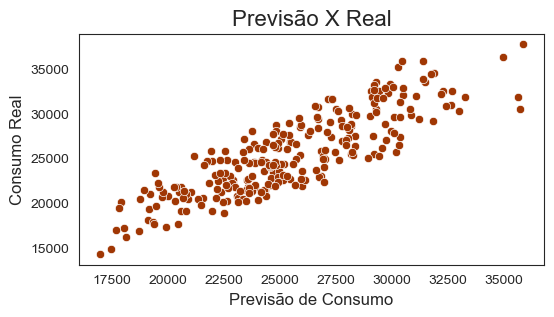

In [46]:
ax = sns.scatterplot(x= y_previsto_train, y= y_train)
ax.figure.set_size_inches(6, 3)
ax.set_title('Previsão X Real', fontsize=16)
ax.set_xlabel('Previsão de Consumo', fontsize=12)
ax.set_ylabel('Consumo Real', fontsize=12)

## Obtendo os resíduos

In [47]:
residuo = y_train - y_previsto_train
residuo

195    3891.289113
344    4040.499863
288   -3010.078635
59    -1704.289133
220    4223.837237
          ...     
73     3186.229912
68     -739.805532
215    3010.236465
341    2588.394409
84     1631.868243
Name: consumo, Length: 255, dtype: float64

## Gráfico de dispersão entre valor estimado e resíduos

Método informal de verificação da hipótese de variância constante dos resíduos (homocedasticidade)

<AxesSubplot:title={'center':'Resíduos X Previsão'}, xlabel='Consumo de Cerveja (litros) - Previsão', ylabel='Resíduos'>

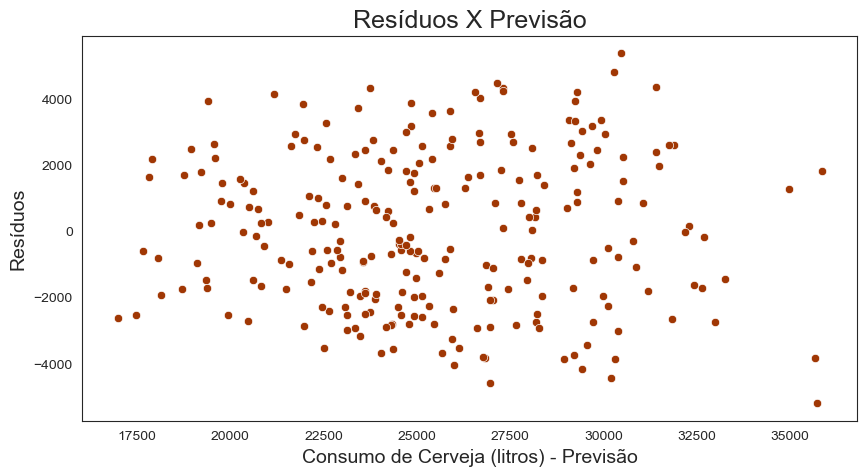

In [48]:
ax = sns.scatterplot(x= y_previsto_train, y= residuo)
ax.figure.set_size_inches(10,5)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

## Utilizando os resíduos ao quadrado

<img width='800px' src='var_u.jpg'>
Fonte: Econometria Básica - 5ª edição - Gujarati e Porter

<AxesSubplot:title={'center':'Resíduos X Previsão'}, xlabel='Consumo de Cerveja (litros) - Previsão', ylabel='Resíduos²'>

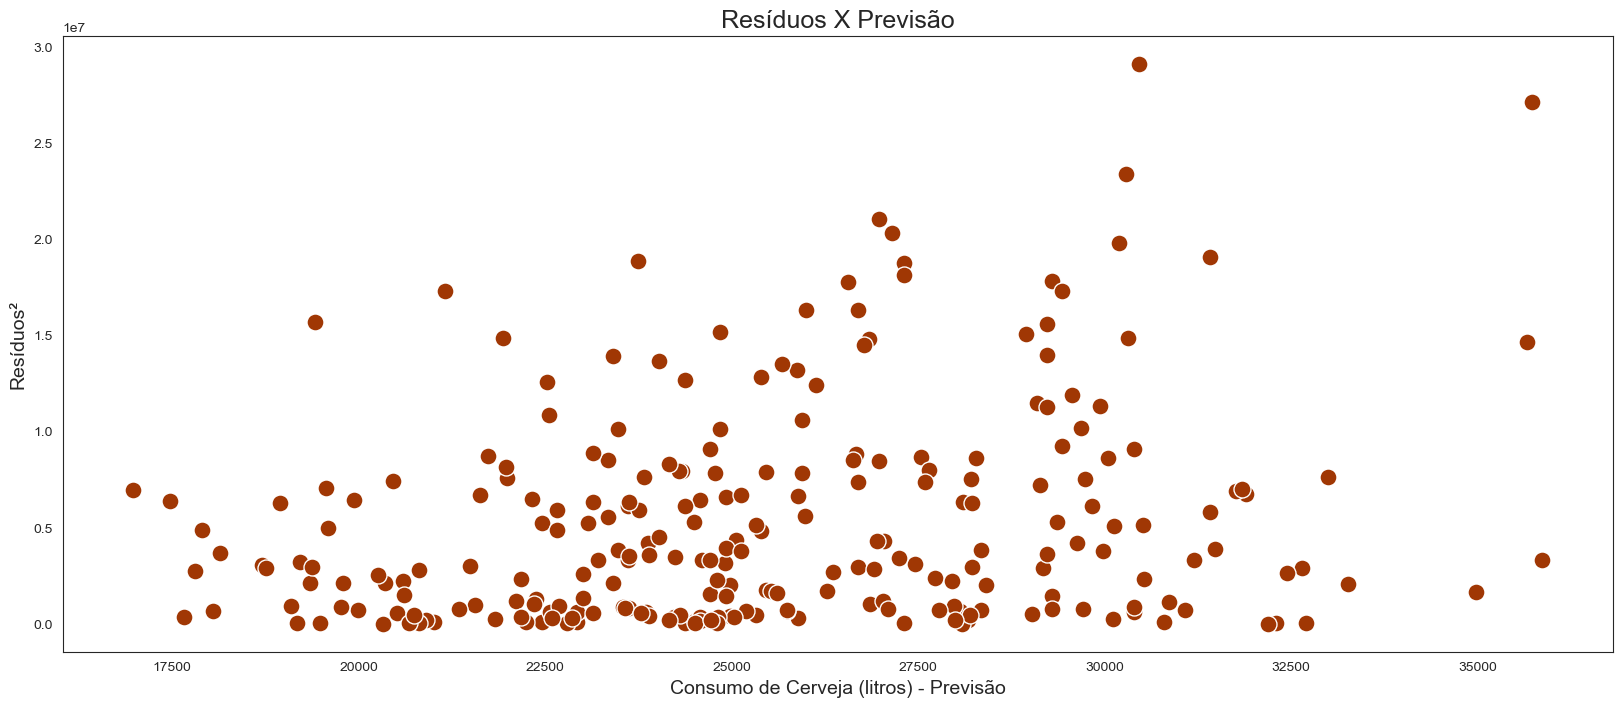

In [49]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo**2, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos²', fontsize=14)
ax

## Plotando a distribuição de frequências dos resíduos

<AxesSubplot:title={'center':'Distribuição de Frequências dos Resíduos'}, xlabel='Litros', ylabel='Count'>

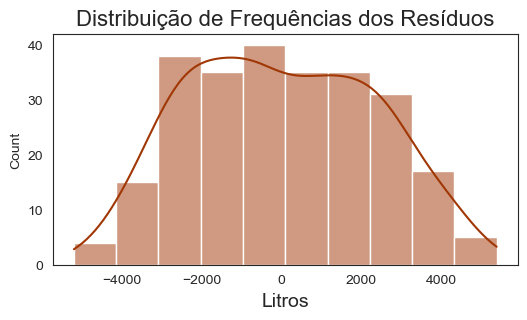

In [50]:
ax = sns.histplot(residuo, kde = True)
ax.figure.set_size_inches(6, 3)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=16)
ax.set_xlabel('Litros', fontsize=14)
ax

# <font color='red' style='font-size: 30px;'>Comparando Modelos</font>
<hr style='border: 2px solid red;'>

## Estimando um novo modelo com a substituição da variável explicativa Temperatura Máxima pela Temperatuda Média

In [76]:
X2 = dados[['temp_media','chuva','fds']]
X3 = dados[['temp_min','chuva','fds']]

## Criando os datasets de treino e de teste

In [77]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=2811)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.3, random_state=2811)

## Instanciando a classe *LinearRegression()*

In [78]:
modelo2 = LinearRegression()
modelo3 = LinearRegression()

## Utilizando o método *fit()* do objeto "modelo_2" para estimar nosso modelo linear utilizando os dados de TREINO (y2_train e X2_train)

In [79]:
modelo2.fit(X2_train,y2_train)
modelo3.fit(X3_train,y3_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do novo modelo estimado e comparando com o resultado do modelo anterior

In [64]:
print('Modelo com Temp. Máxima')
print('R² = {}'.format(modelo.score(X_train,y_train).round(2)))

Modelo com Temp. Máxima
R² = 0.73


In [65]:
print('Modelo com Temp. Média')
print('R² = {}'.format(modelo2.score(X2_train,y2_train).round(2)))

Modelo com Temp. Média
R² = 0.66


In [80]:
print('Modelo com Temp. Mínima')
print('R² = {}'.format(modelo3.score(X3_train,y3_train).round(2)))

Modelo com Temp. Mínima
R² = 0.48


## Gerando previsões para os dados de TESTE (X_test e X2_test) utilizando o método *predict()* dos objetos "modelo" e "modelo_2"

In [81]:
y_previsto2 = modelo2.predict(X2_test)
y_previsto3 = modelo3.predict(X3_test)

## Obtendo o coeficiente de determinação (R²) para as previsões dos dois modelos

In [67]:
print('Modelo com Temp. Máxima')
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))

Modelo com Temp. Máxima
R² = 0.69


In [68]:
print('Modelo com Temp. Máxima')
print('R² = %s' % metrics.r2_score(y2_test, y_previsto2).round(2))

Modelo com Temp. Máxima
R² = 0.66


In [82]:
print('Modelo com Temp. Mínima')
print('R² = %s' % metrics.r2_score(y3_test, y_previsto3).round(2))

Modelo com Temp. Mínima
R² = 0.53


# <font color='red' style='font-size: 30px;'>Outras Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Métricas da regressão
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$



## Obtendo métricas para o modelo com Temperatura Média

In [74]:
EQM2 = metrics.mean_squared_error(y2_test, y_previsto2).round(2)
REQM2 = np.sqrt(metrics.mean_squared_error(y2_test, y_previsto2)).round(2)
R22 = metrics.r2_score(y2_test,y_previsto2).round(2)
metricas2 = pd.DataFrame([EQM2, REQM2, R22], ['EQM','REQM','R²'], columns=['Métricas'])
metricas2

,Métricas
EQM,6060775.46
REQM,2461.86
R²,0.66


## Obtendo métricas para o modelo com Temperatura Máxima

In [75]:
EQM = metrics.mean_squared_error(y_test, y_previsto).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(2)
R2 = metrics.r2_score(y_test,y_previsto).round(2)
metricas = pd.DataFrame([EQM, REQM, R2], ['EQM','REQM','R²'], columns=['Métricas'])
metricas

,Métricas
EQM,5471976.38
REQM,2339.23
R²,0.69


## Obtendo métricas para o modelo com Temperatura Mínima

In [83]:
EQM3 = metrics.mean_squared_error(y3_test, y_previsto3).round(2)
REQM3 = np.sqrt(metrics.mean_squared_error(y3_test, y_previsto3)).round(2)
R23 = metrics.r2_score(y3_test,y_previsto3).round(2)
metricas3 = pd.DataFrame([EQM3, REQM3, R23], ['EQM','REQM','R²'], columns=['Métricas'])
metricas3

,Métricas
EQM,8273883.16
REQM,2876.44
R²,0.53


# <font color='red' style='font-size: 30px;'>Salvando e Carregando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

In [84]:
entrada = X_test[0:1]
entrada

,temp_max,chuva,fds
5,30.5,12.2,0


## Gerando previsão pontual

In [86]:
modelo.predict(entrada)[0]

26094.901775262017

## Criando um simulador simples

In [ ]:
temp_max = 32
chuva = 0
fds = 1
entrada = [[temp_max, chuva, fds]]

print('O consumo médio estimado é de {0:.2f} Litros'.format(modelo.predict(entrada)[0]))

## Salvando o modelo estimado

## pickle (https://docs.python.org/3/library/pickle.html)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O módulo <b>pickle</b> implementa protocolos binários para serializar e desserializar a estrutura de um objeto Python.</p>

In [87]:
import pickle

In [88]:
output = open('modelo_consumo_cerveja', 'wb')
pickle.dump(modelo, output)
output.close()

### Em um novo notebook/projeto Python

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

modelo = open('modelo_consumo_cerveja','rb')
lm_new = pickle.load(modelo)
modelo.close()

temp_max = 30.5
chuva = 12.2
fds = 0
entrada = [[temp_max, chuva, fds]]
print('{0:.2f} litros'.format(lm_new.predict(entrada)[0]))
```

<h4 style='color: red; font-weight: normal'>Out [1]:</h4>

```
26094.90 litros
```